EDA PIPELINE

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import joblib


In [18]:
df=pd.read_csv('Process_data\diabetes_final_standardized.csv')  # Load the dataset
df

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Legion\AppData\Local\Temp\ipykernel_17348\247879204.py:1: SyntaxWarning: invalid escape sequence '\d'
  df=pd.read_csv('Process_data\diabetes_final_standardized.csv')  # Load the dataset


age  gender  alcohol_consumption_per_week  \
0      0.504956       1                     -1.413253   
1     -0.135884       0                     -0.707921   
2      0.633124       1                     -0.707921   
3      1.530299       0                     -1.413253   
4     -0.264052       1                     -0.707921   
...         ...     ...                           ...   
99995 -0.264052       1                     -0.707921   
99996 -0.584472       0                      0.702744   
99997  0.440872       0                      1.408076   
99998 -0.199968       0                      0.702744   
99999  0.120452       0                     -0.707921   

       physical_activity_minutes_per_week  diet_score  sleep_hours_per_day  \
0                                1.138363         5.7             0.824199   
1                                0.285376         6.7            -0.454787   
2                               -0.733470         6.4             2.742678   
3                               -0.828246         3.4            -0.363431   
4                               -0.117424         7.2             0.367418   
...                                   ...         ...                  ...   
99995                            0.202447         8.3            -0.546144   
99996                           -0.508376         8.8            -0.180719   
99997                            0.024741         9.9            -1.825130   
99998                           -0.792705         5.9            -0.272075   
99999                            1.529316         2.7            -1.459705   

       screen_time_hours_per_day  family_history_diabetes  \
0                       0.771162                        0   
1                       1.095260                        0   
2                       0.852187                        1   
3                      -0.322667                        0   
4                      -0.403691                        0   
...                          ...                      ...   
99995                  -0.606252                        0   
99996                  -0.484715                        0   
99997                   0.041943                        0   
99998                  -2.226739                        0   
99999                  -0.201130                        0   

       hypertension_history  cardiovascular_history  ...  \
0                         0                       0  ...   
1                         0                       0  ...   
2                         0                       0  ...   
3                         0                       0  ...   
4                         0                       0  ...   
...                     ...                     ...  ...   
99995                     0                       0  ...   
99996                     0                       0  ...   
99997                     0                       1  ...   
99998                     1                       0  ...   
99999                     0                       0  ...   

       employment_status_Student  employment_status_Unemployed  \
0                              0                             0   
1                              0                             0   
2                              0                             1   
3                              0                             0   
4                              0                             0   
...                          ...                           ...   
99995                          0                             1   
99996                          0                             0   
99997                          0                             0   
99998                          0                             0   
99999                          0                             0   

       smoking_status_Former  smoking_status_Never  bmi_category_Obese  \
0                          0                     1                   

In [19]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Set Plotly renderer for Jupyter Notebook
pio.renderers.default = "notebook_connected"

# Load dataset
df = pd.read_csv(r'Process_data\diabetes_final_standardized.csv')

# Sample for performance
sample_df = df.sample(5000, random_state=42)


In [20]:
!pip install "plotly>=4.0" "nbformat>=4.2.0"



In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Load dataset ---
df = pd.read_csv(r'Process_data\diabetes_final_standardized.csv')

# --- Sample for performance ---
sample_df = df.sample(5000, random_state=42)

# Ensure positive values for sizing
sample_df['diet_score_positive'] = sample_df['diet_score'].abs() + 1
sample_df['physical_activity_positive'] = sample_df['physical_activity_minutes_per_week'].abs() + 1

sns.set_style("whitegrid")


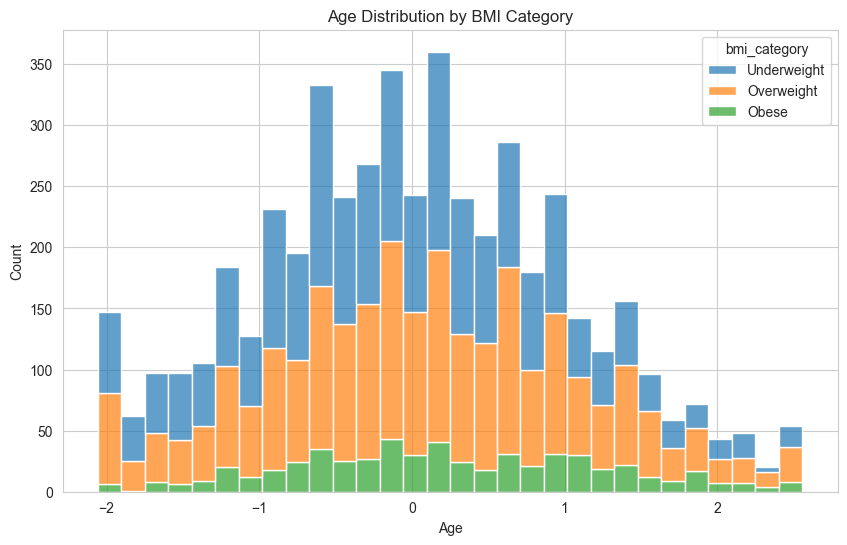

In [22]:
# Create a new column 'bmi_category' based on the one‐hot encoded columns
sample_df['bmi_category'] = np.where(
    sample_df['bmi_category_Obese'] == 1, 'Obese',
    np.where(sample_df['bmi_category_Overweight'] == 1, 'Overweight', 'Underweight')
)

plt.figure(figsize=(10,6))
sns.histplot(
    data=sample_df,
    x='age',
    hue='bmi_category',
    bins=30,
    kde=False,
    multiple='stack',
    alpha=0.7
)
plt.title("Age Distribution by BMI Category")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


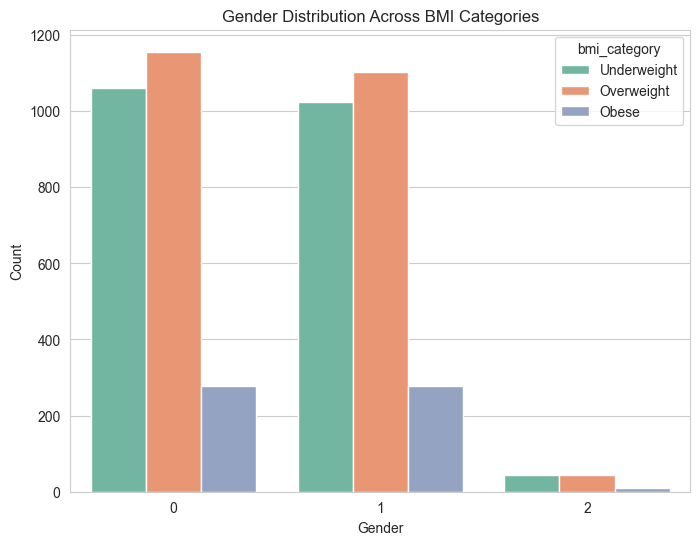

In [23]:
plt.figure(figsize=(8,6))
sns.countplot(
    data=sample_df,
    x='gender',
    hue='bmi_category',
    palette='Set2'
)
plt.title("Gender Distribution Across BMI Categories")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


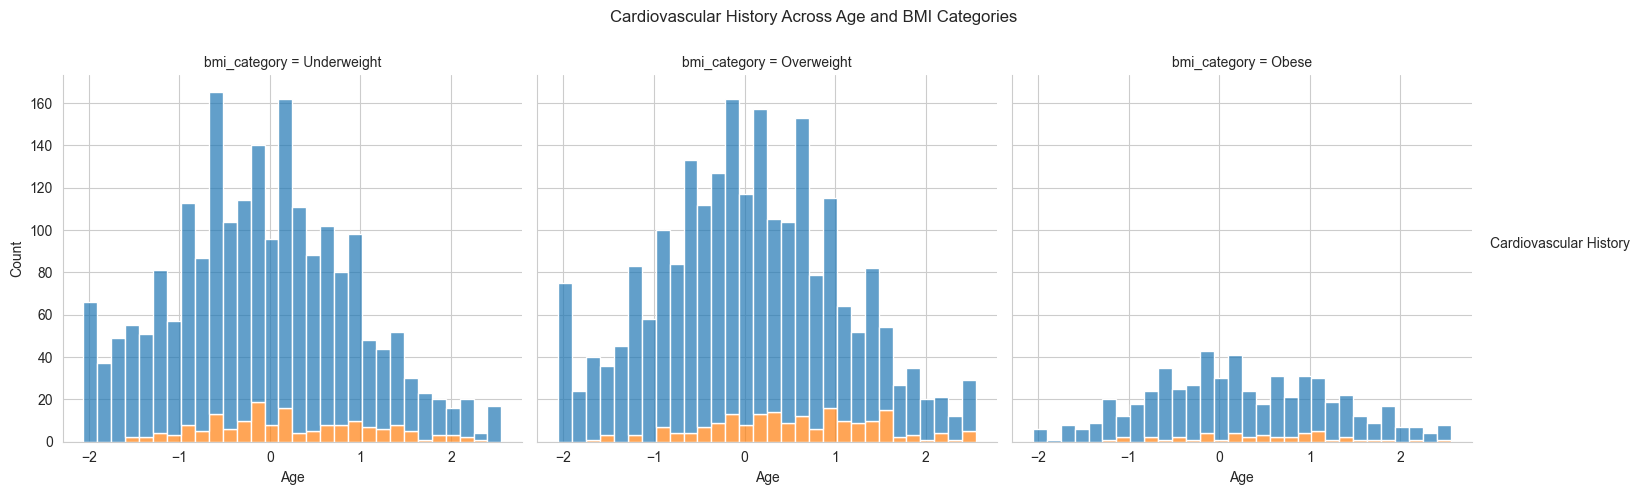

In [24]:
g = sns.FacetGrid(
    sample_df, 
    col='bmi_category', 
    height=5, 
    aspect=1
)
g.map_dataframe(
    sns.histplot, 
    x='age', 
    hue='cardiovascular_history', 
    bins=30, 
    multiple='stack', 
    alpha=0.7
)
g.set_axis_labels("Age", "Count")
g.add_legend(title="Cardiovascular History")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Cardiovascular History Across Age and BMI Categories")
plt.show()


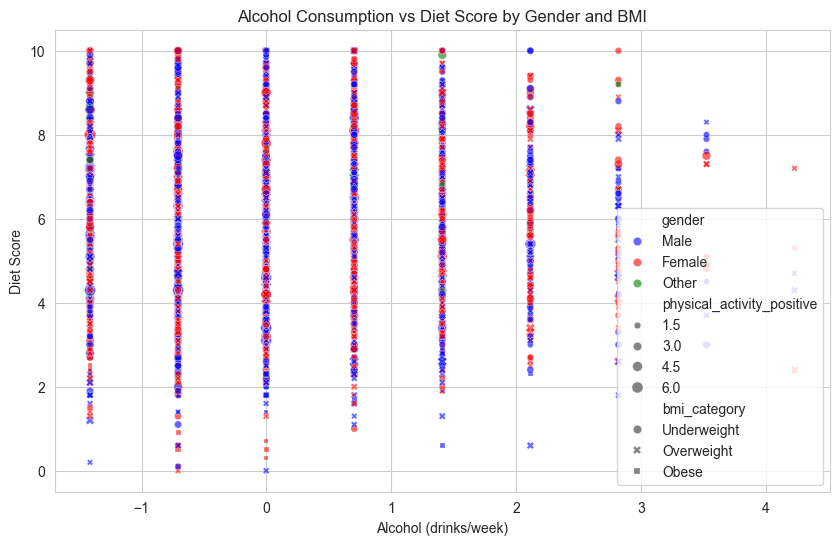

In [25]:
plt.figure(figsize=(10,6))

# Map numeric gender values to string labels
sample_df["gender"] = sample_df["gender"].replace({
    0: "Male",
    1: "Female",
    2: "Other"
})

sns.scatterplot(
    data=sample_df,
    x='alcohol_consumption_per_week',
    y='diet_score',
    hue='gender',
    style='bmi_category',
    size='physical_activity_positive',
    alpha=0.6,
    palette={'Male':'blue', 'Female':'red', 'Other':'green'}
)
plt.title("Alcohol Consumption vs Diet Score by Gender and BMI")
plt.xlabel("Alcohol (drinks/week)")
plt.ylabel("Diet Score")
plt.show()


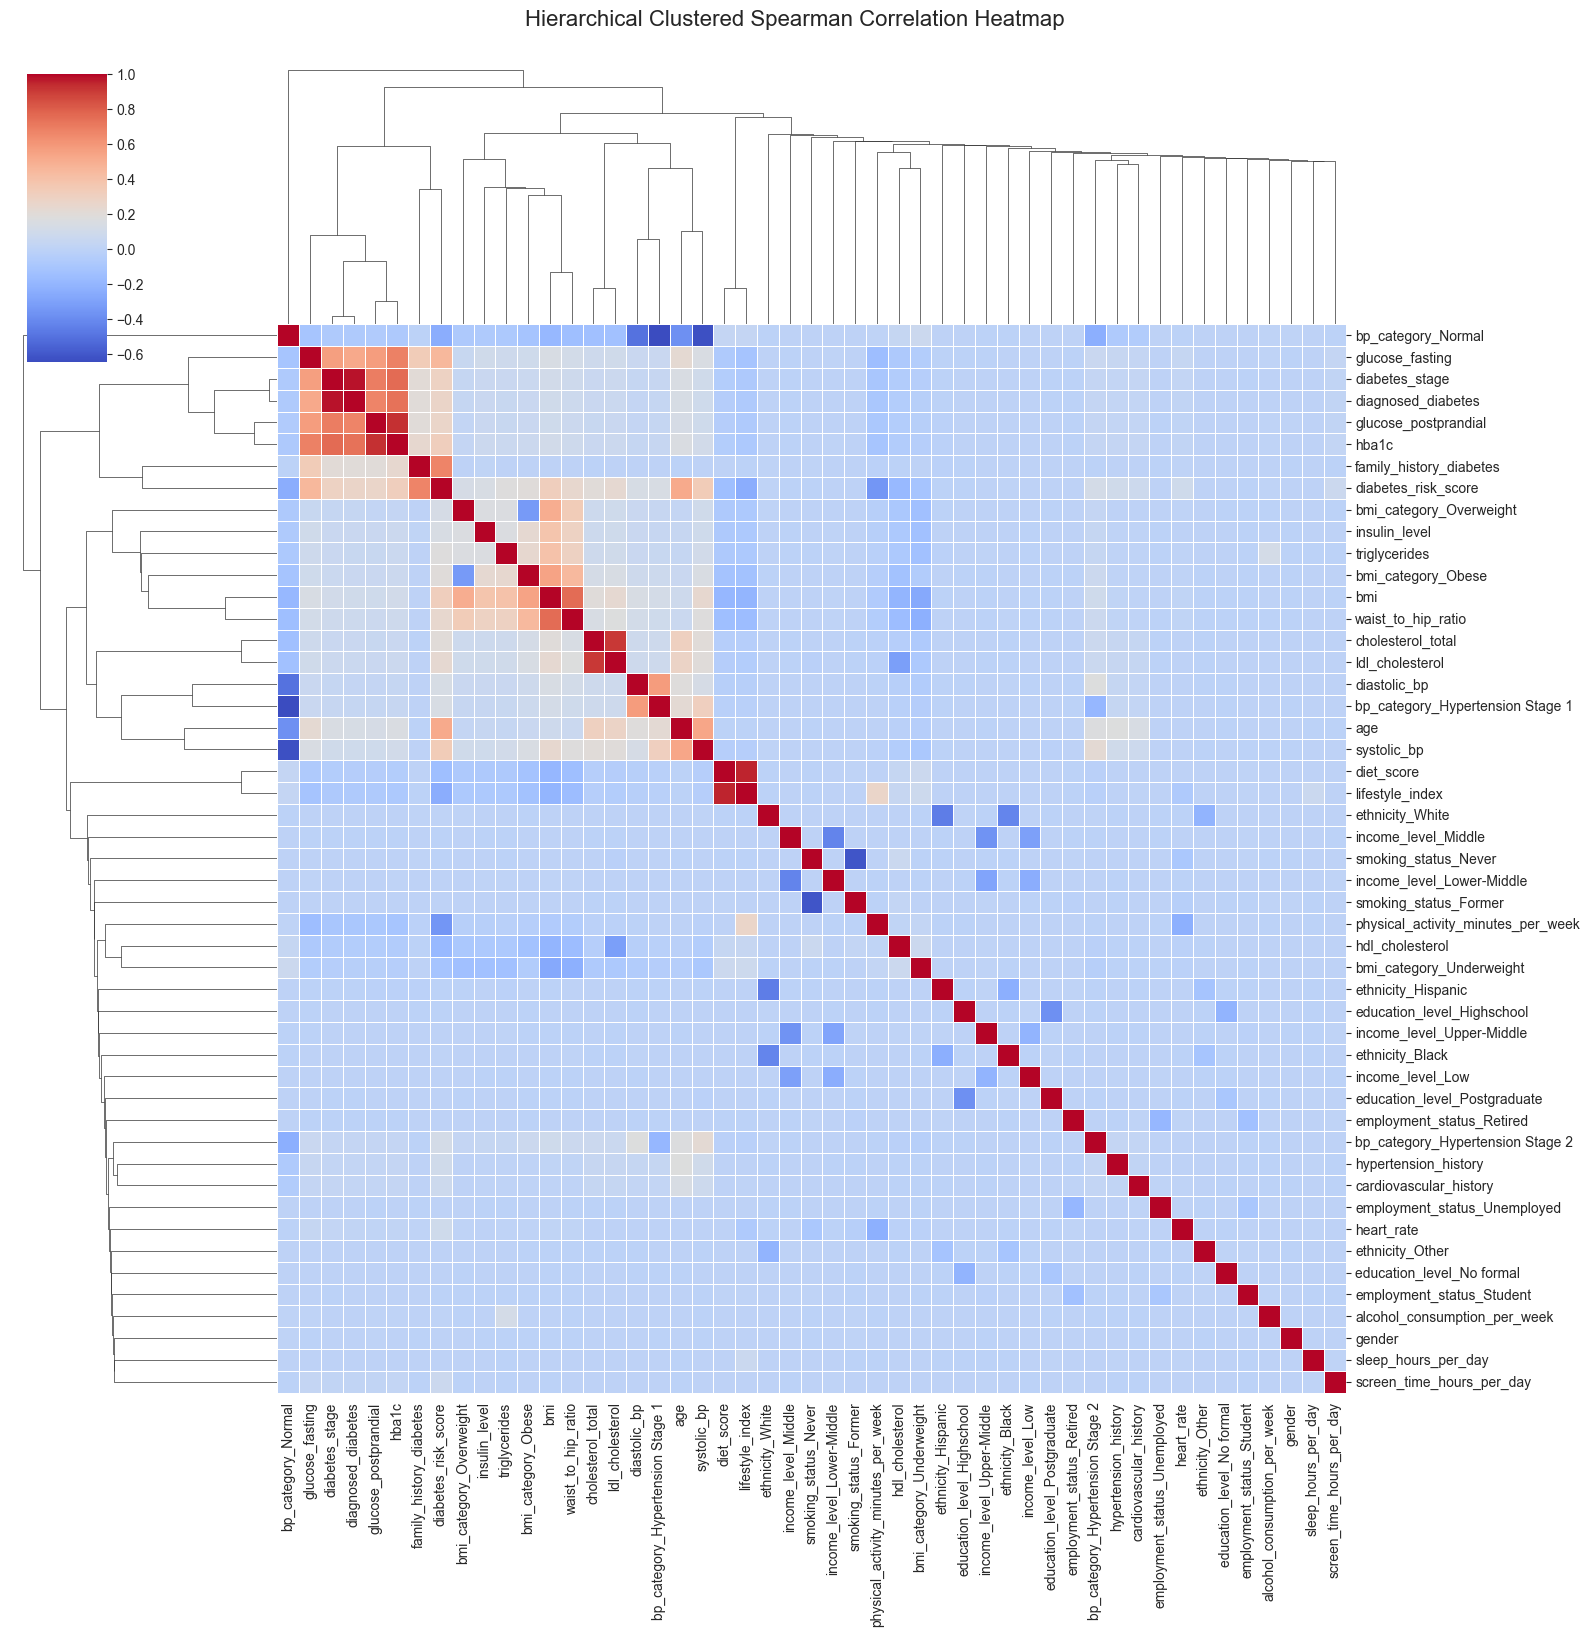

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already loaded the dataset
# df = pd.read_csv("your_dataset.csv")

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Compute Spearman correlation
corr = numeric_df.corr(method='spearman')

# Plot clustered heatmap
sns.clustermap(
    corr,
    cmap='coolwarm',
    figsize=(16, 16),
    linewidths=0.5
)

# Add title outside the clustermap (since clustermap creates its own figure)
plt.suptitle("Hierarchical Clustered Spearman Correlation Heatmap", y=1.02, fontsize=16)
plt.show()


In [27]:
df

age  gender  alcohol_consumption_per_week  \
0      0.504956       1                     -1.413253   
1     -0.135884       0                     -0.707921   
2      0.633124       1                     -0.707921   
3      1.530299       0                     -1.413253   
4     -0.264052       1                     -0.707921   
...         ...     ...                           ...   
99995 -0.264052       1                     -0.707921   
99996 -0.584472       0                      0.702744   
99997  0.440872       0                      1.408076   
99998 -0.199968       0                      0.702744   
99999  0.120452       0                     -0.707921   

       physical_activity_minutes_per_week  diet_score  sleep_hours_per_day  \
0                                1.138363         5.7             0.824199   
1                                0.285376         6.7            -0.454787   
2                               -0.733470         6.4             2.742678   
3                               -0.828246         3.4            -0.363431   
4                               -0.117424         7.2             0.367418   
...                                   ...         ...                  ...   
99995                            0.202447         8.3            -0.546144   
99996                           -0.508376         8.8            -0.180719   
99997                            0.024741         9.9            -1.825130   
99998                           -0.792705         5.9            -0.272075   
99999                            1.529316         2.7            -1.459705   

       screen_time_hours_per_day  family_history_diabetes  \
0                       0.771162                        0   
1                       1.095260                        0   
2                       0.852187                        1   
3                      -0.322667                        0   
4                      -0.403691                        0   
...                          ...                      ...   
99995                  -0.606252                        0   
99996                  -0.484715                        0   
99997                   0.041943                        0   
99998                  -2.226739                        0   
99999                  -0.201130                        0   

       hypertension_history  cardiovascular_history  ...  \
0                         0                       0  ...   
1                         0                       0  ...   
2                         0                       0  ...   
3                         0                       0  ...   
4                         0                       0  ...   
...                     ...                     ...  ...   
99995                     0                       0  ...   
99996                     0                       0  ...   
99997                     0                       1  ...   
99998                     1                       0  ...   
99999                     0                       0  ...   

       employment_status_Student  employment_status_Unemployed  \
0                              0                             0   
1                              0                             0   
2                              0                             1   
3                              0                             0   
4                              0                             0   
...                          ...                           ...   
99995                          0                             1   
99996                          0                             0   
99997                          0                             0   
99998                          0                             0   
99999                          0                             0   

       smoking_status_Former  smoking_status_Never  bmi_category_Obese  \
0                          0                     1                   

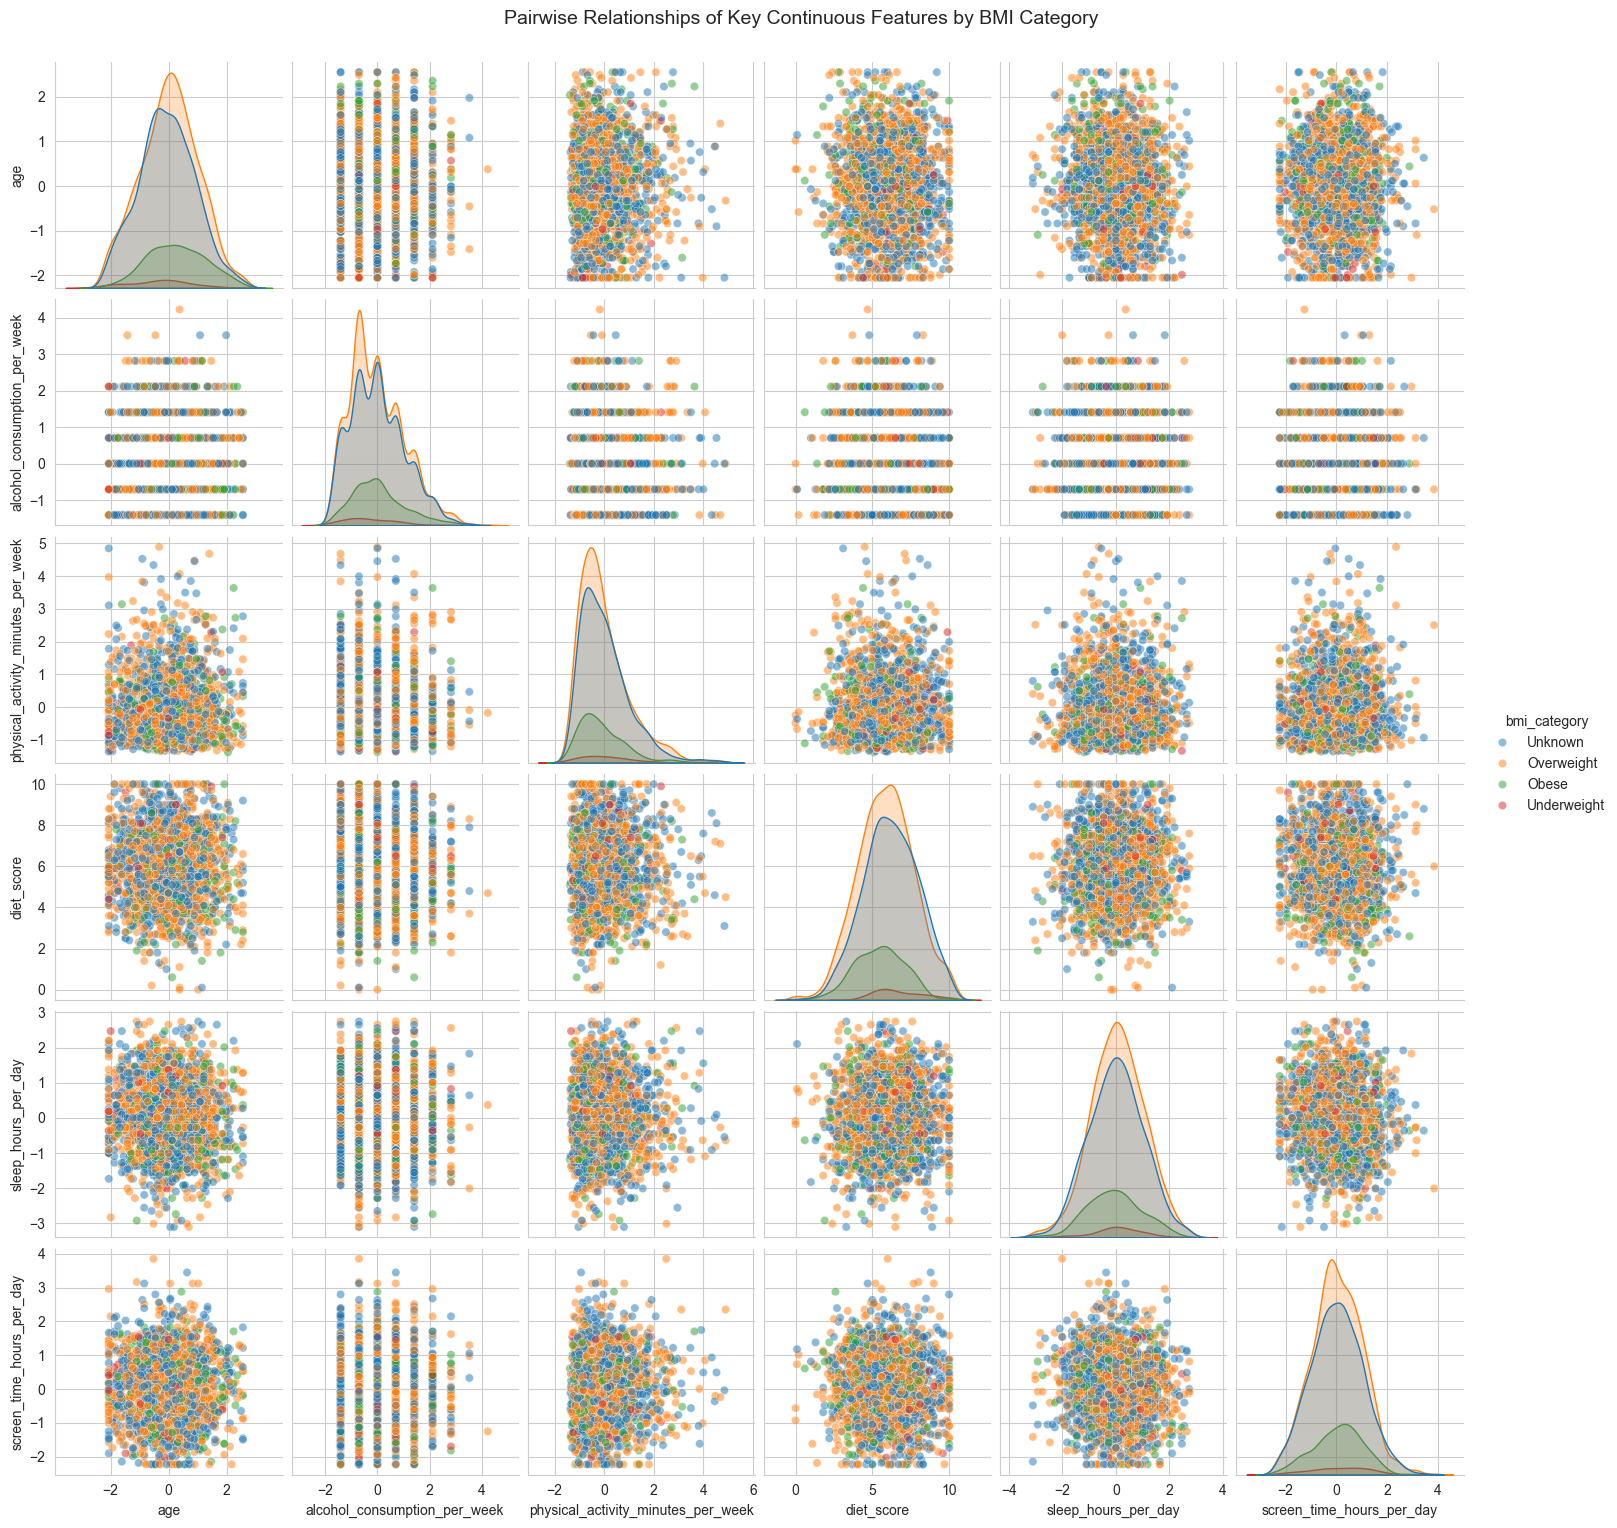

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample for performance
sample_df = df.sample(n=2000, random_state=42)

# ===============================
# 1️⃣ Create a single BMI category column from one-hot
# ===============================
def get_bmi_category(row):
    if row['bmi_category_Obese'] == 1:
        return 'Obese'
    elif row['bmi_category_Overweight'] == 1:
        return 'Overweight'
    elif row['bmi_category_Underweight'] == 1:
        return 'Underweight'
    else:
        return 'Unknown'  # fallback if none is 1

sample_df['bmi_category'] = sample_df.apply(get_bmi_category, axis=1)

# ===============================
# 2️⃣ Select continuous features
# ===============================
continuous_features = [
    'age', 
    'alcohol_consumption_per_week', 
    'physical_activity_minutes_per_week', 
    'diet_score', 
    'sleep_hours_per_day', 
    'screen_time_hours_per_day'
]

# Drop rows with missing values in selected columns
sample_df = sample_df.dropna(subset=continuous_features + ['bmi_category'])

# ===============================
# 3️⃣ Pairplot by BMI category
# ===============================
sns.pairplot(
    sample_df,
    vars=continuous_features,
    hue='bmi_category',
    plot_kws={'alpha': 0.5},
    diag_kind='kde'
)

plt.suptitle(
    "Pairwise Relationships of Key Continuous Features by BMI Category", 
    y=1.02, fontsize=14
)
plt.show()


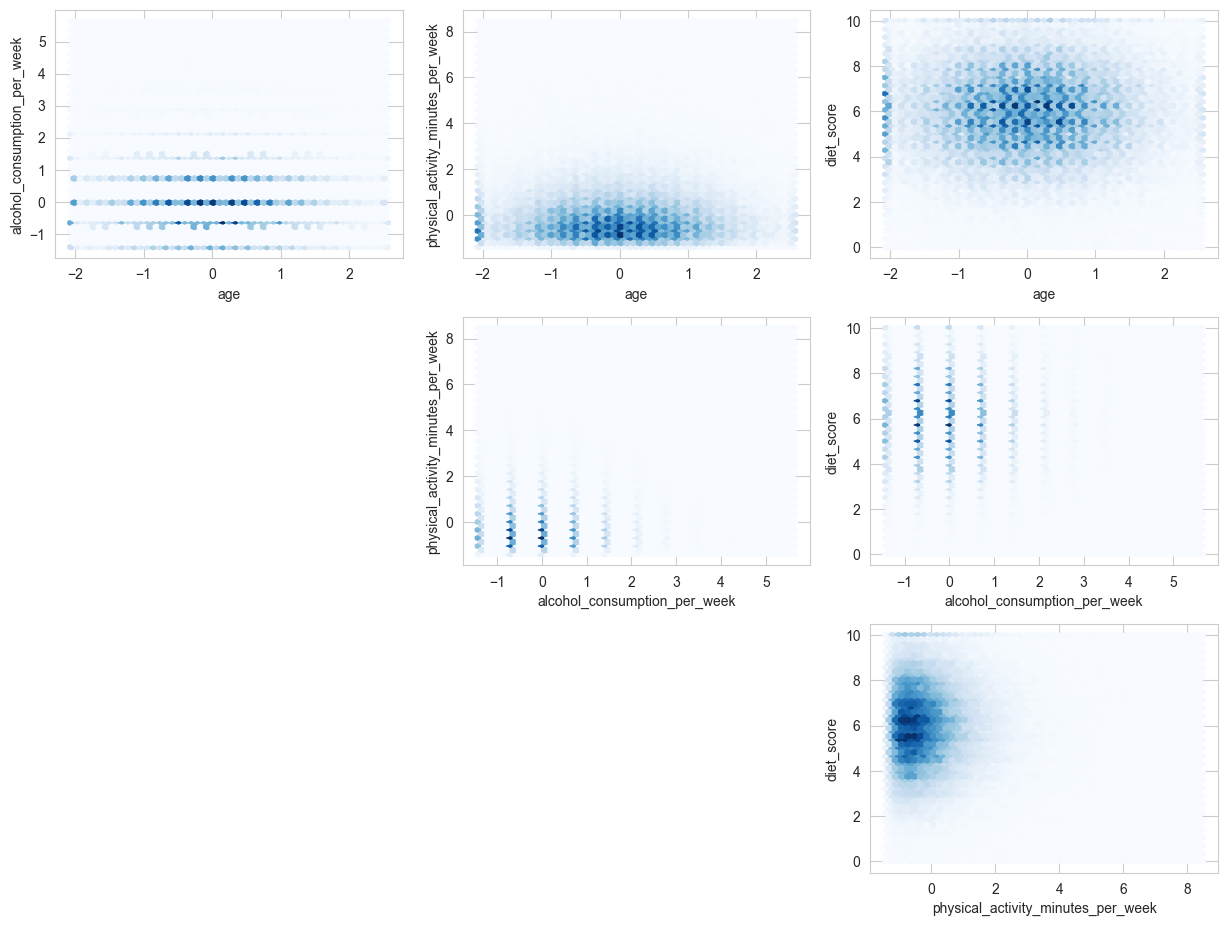

In [29]:
continuous_features = [
    'age',
    'alcohol_consumption_per_week',
    'physical_activity_minutes_per_week',
    'diet_score'
]

import matplotlib.pyplot as plt

# Hexbin plots for pairwise relationships
plt.figure(figsize=(16,12))

for i, x_col in enumerate(continuous_features):
    for j, y_col in enumerate(continuous_features):
        if i < j:
            plt.subplot(len(continuous_features), len(continuous_features), i*len(continuous_features)+j+1)
            plt.hexbin(df[x_col], df[y_col], gridsize=50, cmap='Blues')
            plt.xlabel(x_col)
            plt.ylabel(y_col)
plt.tight_layout()
plt.show()


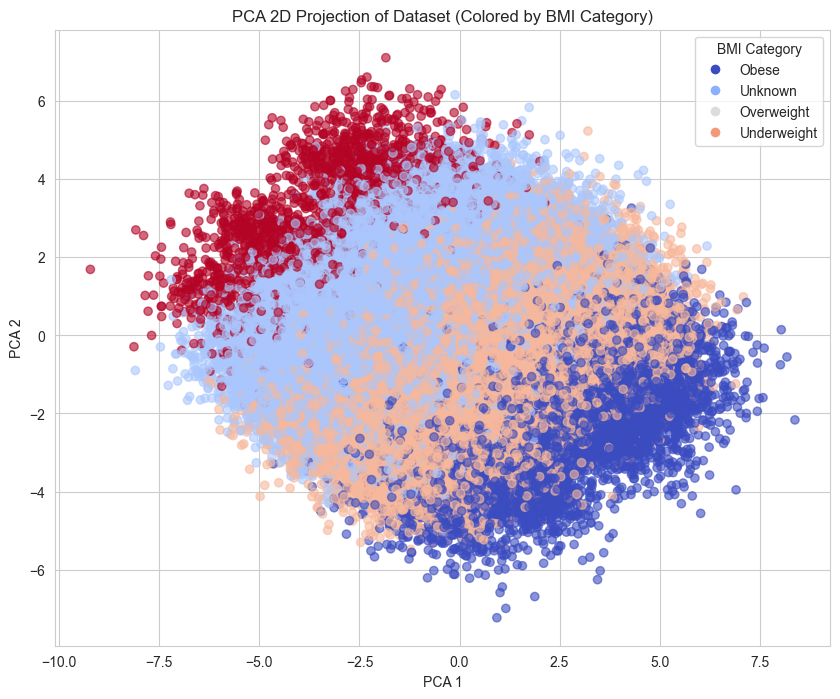

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ===============================
# 1️⃣ Create a single BMI category column from one-hot
# ===============================
def get_bmi_category(row):
    if row['bmi_category_Obese'] == 1:
        return 'Obese'
    elif row['bmi_category_Overweight'] == 1:
        return 'Overweight'
    elif row['bmi_category_Underweight'] == 1:
        return 'Underweight'
    else:
        return 'Unknown'  # fallback

df['bmi_category'] = df.apply(get_bmi_category, axis=1)

# ===============================
# 2️⃣ Select numeric features for PCA
# ===============================
# Exclude boolean/binary one-hot columns if desired, and drop rows with missing values
numeric_df = df.select_dtypes(include=['float64', 'int64']).dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# ===============================
# 3️⃣ Perform PCA
# ===============================
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame for plotting using the index of numeric_df
pca_df = pd.DataFrame({
    'PCA1': pca_result[:, 0],
    'PCA2': pca_result[:, 1],
    'bmi_category': df.loc[numeric_df.index, 'bmi_category'].values
})

# Convert BMI category to numeric codes for coloring
bmi_codes, unique_bmis = pd.factorize(pca_df['bmi_category'])

# ===============================
# 4️⃣ Plot PCA scatter
# ===============================
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    pca_df['PCA1'],
    pca_df['PCA2'],
    c=bmi_codes,
    cmap='coolwarm',
    alpha=0.6
)

# Create a color legend
handles = [
    plt.Line2D([0], [0], marker='o', color='w', label=label,
               markerfacecolor=plt.cm.coolwarm(i / len(unique_bmis)), markersize=8)
    for i, label in enumerate(unique_bmis)
]
plt.legend(handles=handles, title='BMI Category')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA 2D Projection of Dataset (Colored by BMI Category)')
plt.show()


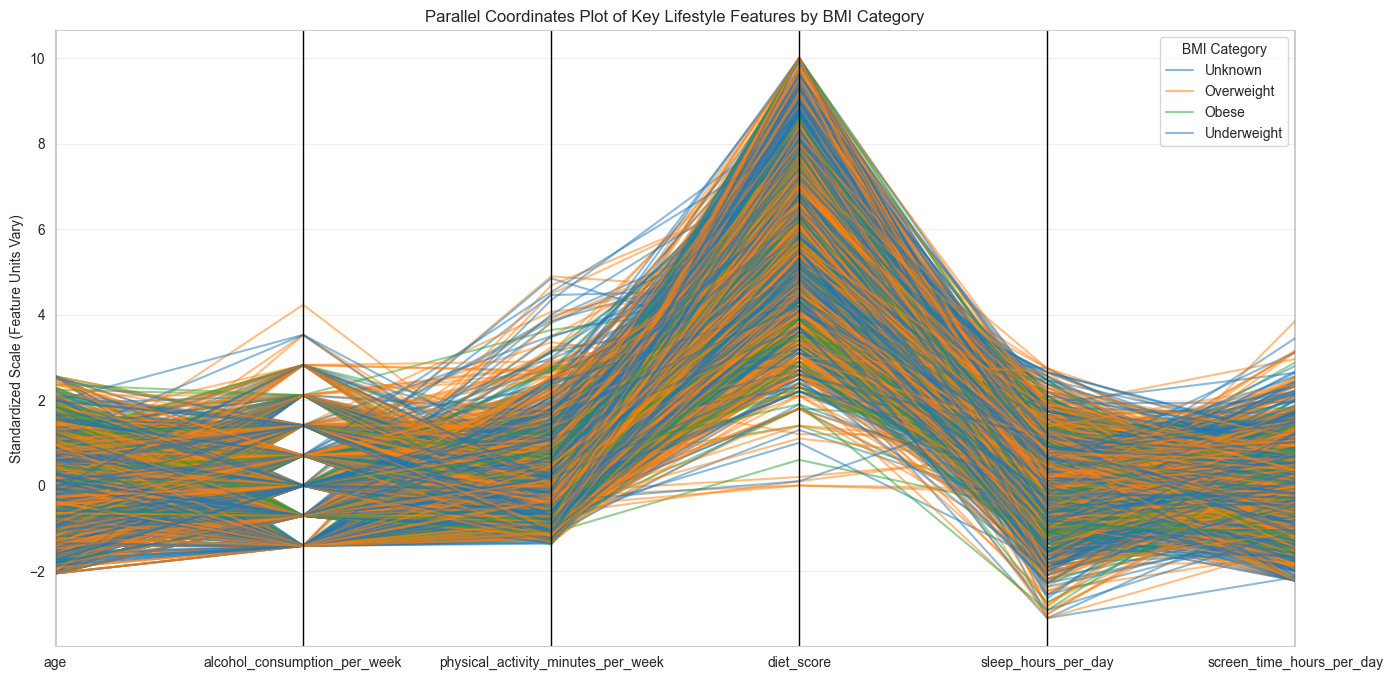

In [31]:
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
import pandas as pd

# Sample for readability
sample_df = df.sample(n=2000, random_state=42)

# Select features
features = [
    'age',
    'alcohol_consumption_per_week',
    'physical_activity_minutes_per_week',
    'diet_score',
    'sleep_hours_per_day',
    'screen_time_hours_per_day',
    'bmi_category'   # ✅ Corrected column name
]

# Drop missing values in selected columns
sample_df = sample_df.dropna(subset=features)

plt.figure(figsize=(16, 8))

# Parallel coordinates plot grouped by BMI category
parallel_coordinates(
    sample_df[features],
    class_column='bmi_category',
    color=['#1f77b4', '#ff7f0e', '#2ca02c'],  # colors for Normal, Overweight, Obese
    alpha=0.5
)

plt.title("Parallel Coordinates Plot of Key Lifestyle Features by BMI Category")
plt.ylabel("Standardized Scale (Feature Units Vary)")
plt.grid(True, alpha=0.3)
plt.legend(title='BMI Category')
plt.show()


C:\Users\Legion\AppData\Local\Temp\ipykernel_17348\1391297680.py:22: FutureWarning:



The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.



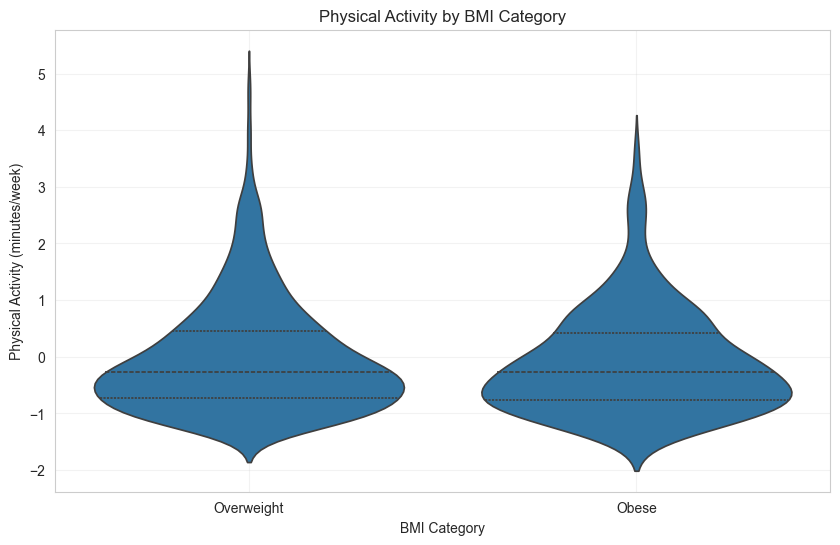

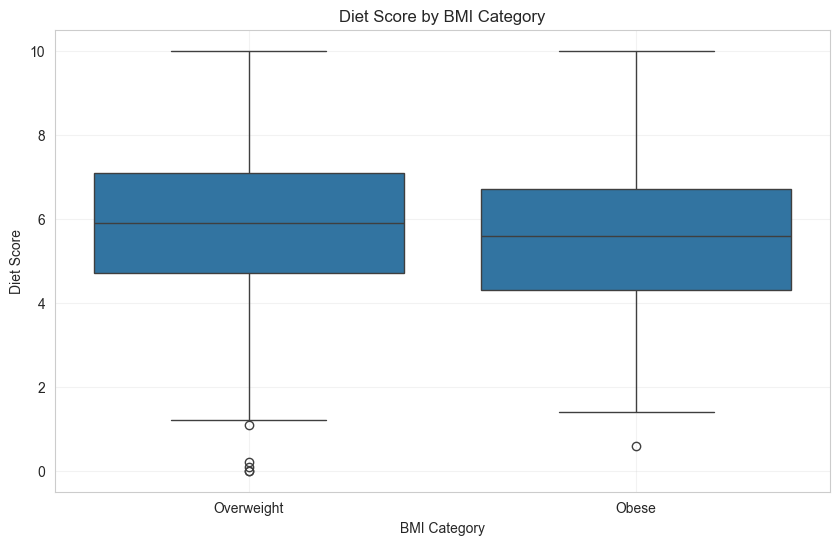

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample for performance
sample_df = df.sample(n=2000, random_state=42)

# Use the real categorical column name
cat_col = 'bmi_category'

# Drop rows with missing values in the columns we'll plot
sample_df = sample_df.dropna(subset=[cat_col, 'physical_activity_minutes_per_week', 'diet_score'])

# If you expect standard categories, keep a sensible order but only the ones present
desired_order = ['Normal', 'Overweight', 'Obese']
order = [c for c in desired_order if c in sample_df[cat_col].unique()]
# If none of desired_order present, fall back to sorted unique values
if not order:
    order = sorted(sample_df[cat_col].unique())

# Violin plot: show distribution of physical activity by BMI category
plt.figure(figsize=(10, 6))
sns.violinplot(
    x=cat_col,
    y='physical_activity_minutes_per_week',
    data=sample_df,
    order=order,
    inner='quartile',   # shows median and quartiles
    scale='width'       # makes widths comparable
)
plt.xlabel('BMI Category')
plt.ylabel('Physical Activity (minutes/week)')
plt.title('Physical Activity by BMI Category')
plt.grid(alpha=0.25)
plt.show()

# Boxplot: diet score by BMI category
plt.figure(figsize=(10, 6))
sns.boxplot(
    x=cat_col,
    y='diet_score',
    data=sample_df,
    order=order
)
plt.xlabel('BMI Category')
plt.ylabel('Diet Score')
plt.title('Diet Score by BMI Category')
plt.grid(alpha=0.25)
plt.show()


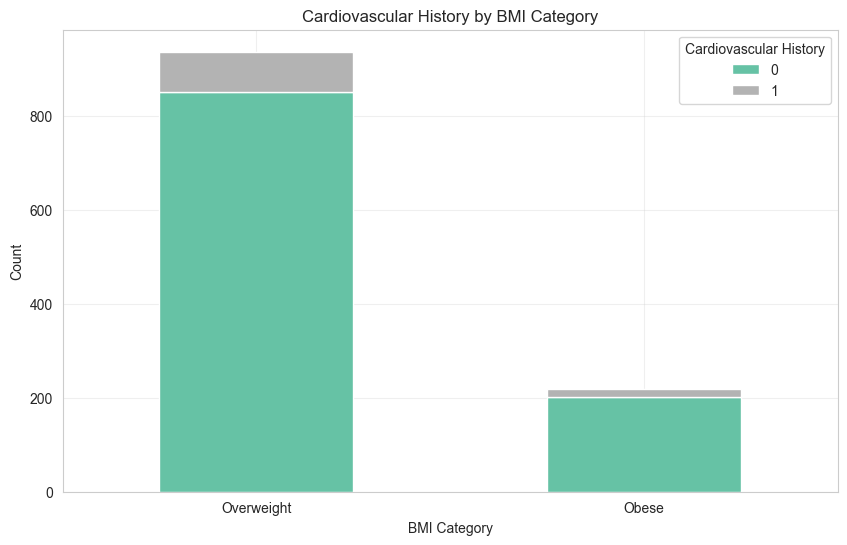

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Use the correct column name
cat_col = 'bmi_category'

# Drop missing values in the relevant columns
sample_df = df.sample(n=2000, random_state=42).dropna(subset=[cat_col, 'cardiovascular_history'])

# Order categories if these labels exist
desired_order = ['Normal', 'Overweight', 'Obese']
order = [c for c in desired_order if c in sample_df[cat_col].unique()]
if not order:
    order = sorted(sample_df[cat_col].unique())

# Create crosstab
counts = pd.crosstab(sample_df[cat_col], sample_df['cardiovascular_history'])
counts = counts.reindex(order)  # ensure consistent order

# Plot stacked bar chart
counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

plt.title('Cardiovascular History by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.legend(title='Cardiovascular History')
plt.grid(alpha=0.3)
plt.xticks(rotation=0)
plt.show()


In [34]:
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "notebook_connected"

# Example Plotly chart
import pandas as pd

# Sample dataframe
df = pd.DataFrame({
    'x': [1,2,3,4],
    'y': [10,15,13,17]
})

fig = px.scatter(df, x='x', y='y', title="Example Scatter Plot")
fig.show()


In [35]:
import seaborn as sns

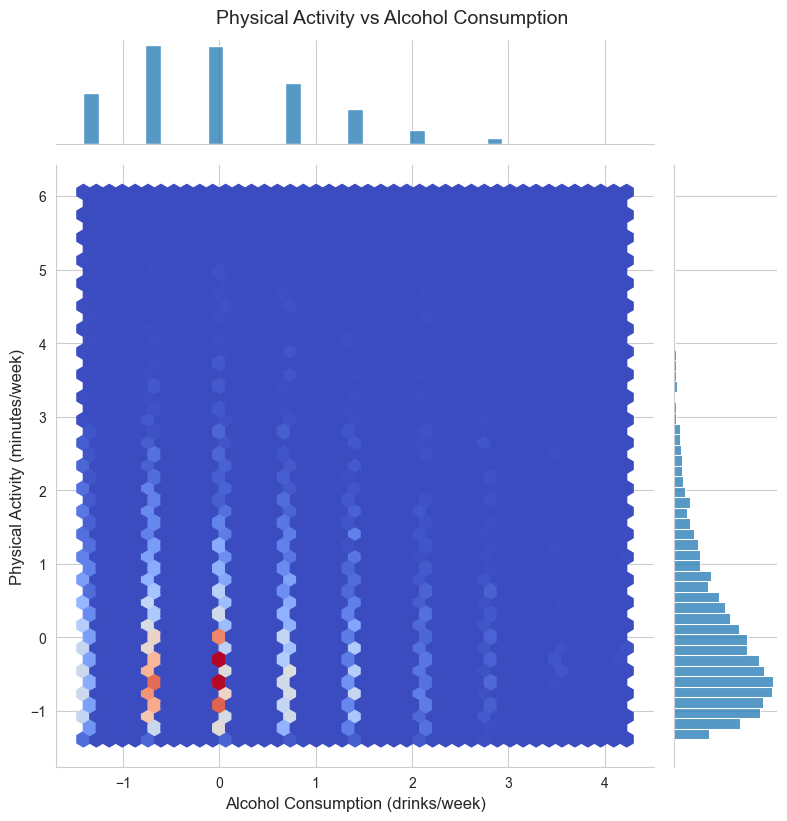

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
# Sample for performance, adjust sample size if full_df has fewer than 5000 rows
full_df = pd.read_csv('Process_data/diabetes_final_standardized.csv')
sample_df = full_df.sample(min(5000, len(full_df)), random_state=42)

# Joint plot with hexbin style
sns.set_style("whitegrid")
g = sns.jointplot(
    x='alcohol_consumption_per_week',
    y='physical_activity_minutes_per_week',
    data=sample_df,
    kind='hex',       # hexbin style
    cmap='coolwarm',
    height=8          # figure size
)

g.set_axis_labels("Alcohol Consumption (drinks/week)", "Physical Activity (minutes/week)", fontsize=12)
plt.suptitle("Physical Activity vs Alcohol Consumption", y=1.02, fontsize=14)
plt.show()


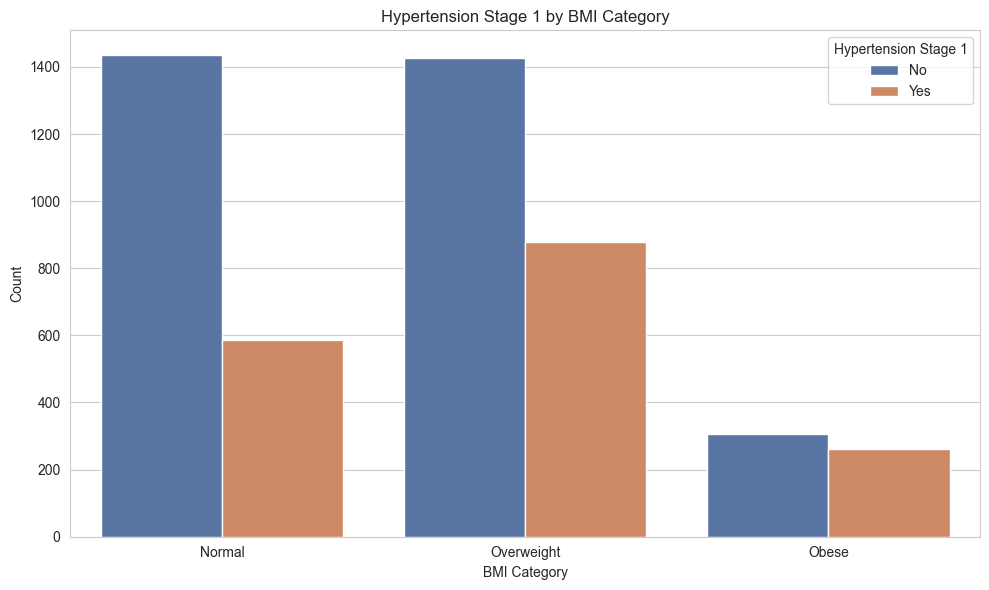

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Load dataset ---
df = pd.read_csv(r'Process_data\diabetes_final_standardized.csv')  # raw string for Windows paths

# --- Create single BMI category column from one-hot ---
def get_bmi_category(row):
    if row['bmi_category_Obese'] == 1:
        return 'Obese'
    elif row['bmi_category_Overweight'] == 1:
        return 'Overweight'
    elif row['bmi_category_Underweight'] == 1:
        return 'Underweight'
    else:
        return 'Normal'  # fallback

df['bmi_category'] = df.apply(get_bmi_category, axis=1)

# --- Create single BP category column from one-hot ---
def get_bp_category(row):
    if row['bp_category_Hypertension Stage 1'] == 1:
        return 'Hypertension Stage 1'
    elif row['bp_category_Hypertension Stage 2'] == 1:
        return 'Hypertension Stage 2'
    elif row['bp_category_Normal'] == 1:
        return 'Normal'
    else:
        return 'Other'  # fallback

df['bp_category'] = df.apply(get_bp_category, axis=1)

# --- Sample for performance and drop missing values ---
sample_df = df.sample(5000, random_state=42).dropna(subset=['bmi_category', 'bp_category']).copy()

# --- Create a boolean column: True if Hypertension Stage 1, False otherwise ---
sample_df['hypertension_stage_1'] = sample_df['bp_category'] == 'Hypertension Stage 1'

# --- Ensure a sensible BMI order ---
desired_order = ['Normal', 'Overweight', 'Obese']
bmi_order = [c for c in desired_order if c in sample_df['bmi_category'].unique()]
if not bmi_order:
    bmi_order = sorted(sample_df['bmi_category'].unique())

# --- Plot with Seaborn countplot ---
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))

sns.countplot(
    data=sample_df,
    x='bmi_category',
    hue='hypertension_stage_1',
    palette=['#4C72B0', '#DD8452'],   # blue = No, orange = Yes
    order=bmi_order,
    hue_order=[False, True]
)

plt.title("Hypertension Stage 1 by BMI Category")
plt.xlabel("BMI Category")
plt.ylabel("Count")

# Replace default legend labels
legend = plt.legend(title='Hypertension Stage 1')
for t, l in zip(legend.get_texts(), ['No', 'Yes']):
    t.set_text(l)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


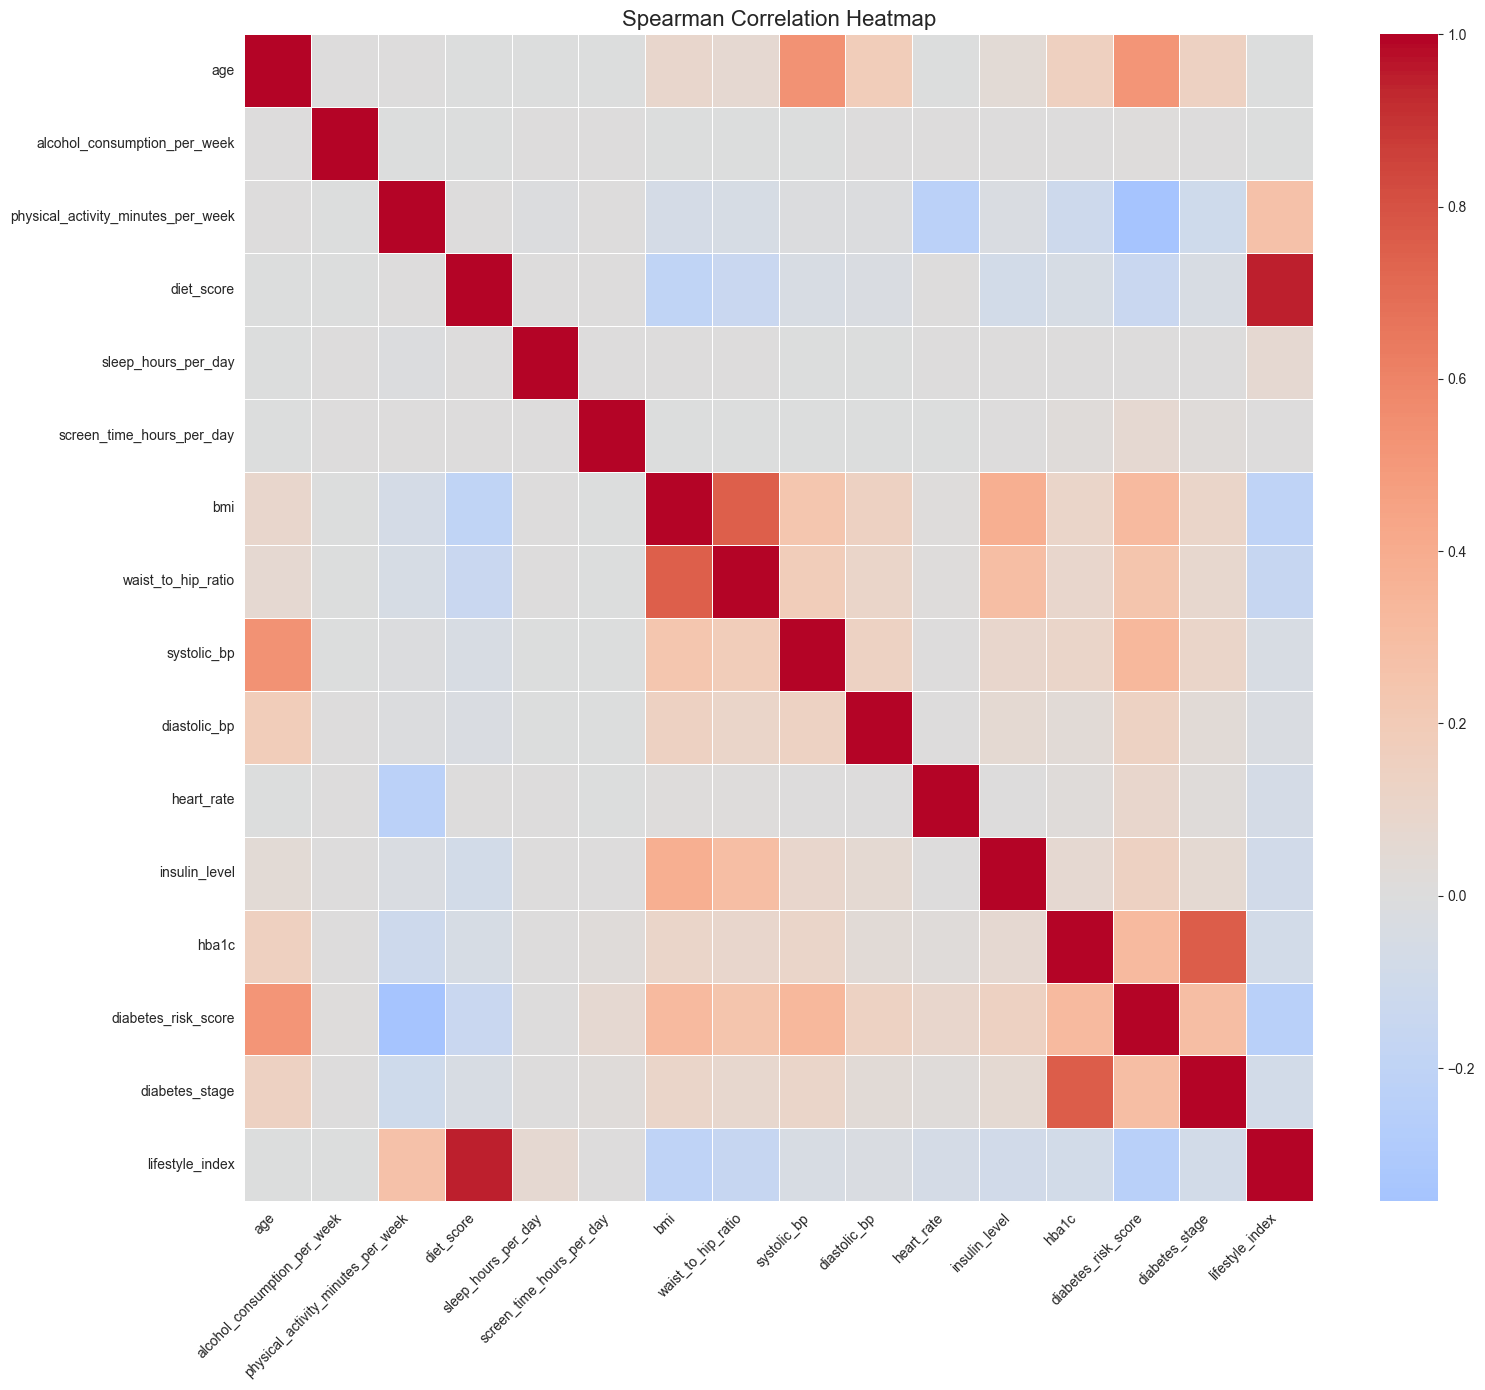

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- Select only numeric continuous columns (float64) ---
numeric_cols = df.select_dtypes(include=['float64']).columns

# Optional: include int64 if you want binary/categorical correlations
# numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# --- Compute Spearman correlation ---
corr = df[numeric_cols].corr(method='spearman')

# --- Plot heatmap ---
plt.figure(figsize=(16,14))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False, linewidths=0.5)
plt.title("Spearman Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


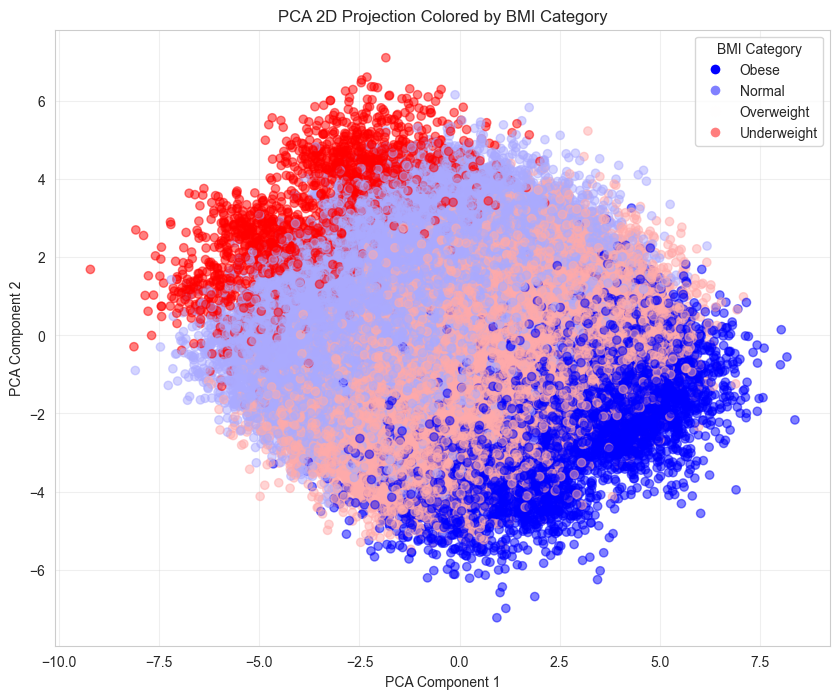

In [39]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# --- Create single BMI category column from one-hot ---
def get_bmi_category(row):
    if row['bmi_category_Obese'] == 1:
        return 'Obese'
    elif row['bmi_category_Overweight'] == 1:
        return 'Overweight'
    elif row['bmi_category_Underweight'] == 1:
        return 'Underweight'
    else:
        return 'Normal'  # fallback

df['bmi_category'] = df.apply(get_bmi_category, axis=1)

# --- Select numeric columns for PCA ---
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# --- Standardize numeric features ---
scaler = StandardScaler()
df_clean = df.dropna(subset=numeric_cols)  # drop rows with missing numeric values
scaled_data = scaler.fit_transform(df_clean[numeric_cols])

# --- Perform PCA ---
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
# --- Convert BMI category to numeric codes for coloring ---
bmi_codes, bmi_labels = pd.factorize(df_clean['bmi_category'])

# --- Plot PCA ---
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    pca_result[:, 0],
    pca_result[:, 1],
    c=bmi_codes,
    cmap='bwr',  # blue-red colormap
    alpha=0.5
)

# Add legend
handles = [
    plt.Line2D([0], [0], marker='o', color='w', label=label,
               markerfacecolor=plt.cm.bwr(i / len(bmi_labels)), markersize=8)
    for i, label in enumerate(bmi_labels)
]
plt.legend(handles=handles, title='BMI Category')

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA 2D Projection Colored by BMI Category")
plt.grid(alpha=0.3)
plt.show()


In [40]:
import pandas as pd

# --- Load dataset ---
df = pd.read_csv(r'Process_data\diabetes_final_standardized.csv')

# --- Create single BMI category column from one-hot ---
def get_bmi_category(row):
    if row['bmi_category_Obese'] == 1:
        return 'Obese'
    elif row['bmi_category_Overweight'] == 1:
        return 'Overweight'
    elif row['bmi_category_Underweight'] == 1:
        return 'Underweight'
    else:
        return 'Normal'  # fallback

df['bmi_category'] = df.apply(get_bmi_category, axis=1)

# --- Numeric features including boolean columns ---
numeric_df = df.select_dtypes(include=['float64', 'int64', 'bool']).copy()

# --- Convert BMI category to numeric codes ---
df['bmi_category_code'] = pd.factorize(df['bmi_category'])[0]

# Add the coded BMI column to numeric_df for correlation
numeric_df['bmi_category_code'] = df['bmi_category_code']

# --- Compute absolute correlation with BMI category ---
correlations = numeric_df.corr()['bmi_category_code'].abs().sort_values(ascending=False)

# --- Select top 5 features excluding the target itself ---
main_features = correlations.index[1:6]

print("Top 5 features most correlated with BMI category:")
print(main_features)


Top 5 features most correlated with BMI category:
Index(['bmi_category_Overweight', 'bmi_category_Obese',
       'bmi_category_Underweight', 'bmi', 'waist_to_hip_ratio'],
      dtype='object')




### 📊 Chart 1: **BMI vs BMI Category**

**Title:** *Linear Regression: BMI vs BMI Category*

* **X-axis:** `BMI` (Body Mass Index)
* **Y-axis:** `bmi_category_code` (numeric code for BMI category: 0 = Normal, 1 = Overweight, 2 = Obese)
* **Observations:**

  * Three horizontal clusters corresponding to Normal, Overweight, and Obese.
  * The red regression line slopes upward, indicating a **positive association**: higher BMI values correspond to higher BMI category codes.
  * Continuous BMI values allow a clear trend across categories.
  * The confidence interval around the line visualizes model certainty.

---

### 📊 Chart 2: **Waist-to-Hip Ratio vs BMI Category**

**Title:** *Linear Regression: Waist-to-Hip Ratio vs BMI Category*

* **X-axis:** `waist_to_hip_ratio`
* **Y-axis:** `bmi_category_code`
* **Observations:**

  * Clustering across the three BMI categories is visible.
  * The regression line slopes upward, showing that **higher waist-to-hip ratios** are associated with higher BMI categories.
  * This aligns with clinical understanding that visceral fat (measured by waist-to-hip ratio) is a predictor of obesity.

---

### 📊 Chart 3: **Triglycerides vs BMI Category**

**Title:** *Linear Regression: Triglycerides vs BMI Category*

* **X-axis:** `triglycerides` (blood fat levels)
* **Y-axis:** `bmi_category_code`
* **Observations:**

  * The numeric encoding shows three discrete outcome levels, with higher triglycerides tending toward higher BMI categories.
  * The regression line shows a **positive trend**, indicating that higher triglyceride levels are associated with higher BMI category codes.
  * Supports the role of metabolic markers in obesity risk.

---

### 📊 Chart 4: **Insulin Level vs BMI Category**

**Title:** *Linear Regression: Insulin Level vs BMI Category*

* **X-axis:** `insulin_level`
* **Y-axis:** `bmi_category_code`
* **Observations:**

  * Outcome clusters correspond to BMI categories.
  * The regression line slopes upward, suggesting that **higher insulin levels** are linked to higher BMI categories.
  * Consistent with insulin resistance being common in overweight and obese individuals.

---

### 📊 Chart 5: **BMI Overweight vs BMI Category**

**Title:** *Linear Regression: BMI Overweight vs BMI Category*

* **X-axis:** `bmi_category_code` or a binary derived from BMI category (e.g., 1 = Overweight, 0 = otherwise)
* **Y-axis:** `bmi_category_code`
* **Observations:**

  * Very limited points if using a binary Overweight indicator.
  * Regression line may slope downward slightly because Overweight and Obese are mutually exclusive in the binary encoding.
  * This predictor is **categorical**, so linear regression is not ideal, and interpretation should be cautious.

---

### 🔍 Comparative Analysis

| Chart | Predictor Variable   | Association with BMI Category | Type of Variable | Strength of Insight |
| ----- | -------------------- | ----------------------------- | ---------------- | ------------------- |
| 1     | BMI                  | Positive                      | Continuous       | Strong              |
| 2     | Waist-to-Hip Ratio   | Positive                      | Continuous       | Strong              |
| 3     | Triglycerides        | Positive                      | Continuous       | Moderate–Strong     |
| 4     | Insulin Level        | Positive                      | Continuous       | Moderate–Strong     |
| 5     | Overweight Indicator | Slight Negative / Weak        | Binary           | Weak / Limited      |

---

### 🧠 Key Takeaways

* **Continuous predictors** like BMI, waist-to-hip ratio, triglycerides, and insulin levels show **clear positive trends** with BMI category codes.
* **Binary or categorical predictors** (e.g., Overweight indicator) are less suitable for linear regression due to mutual exclusivity and limited data points.
* Regression on numeric-coded BMI categories allows visualization of trends across all three groups (Normal → Overweight → Obese).
* Confidence intervals help assess the reliability of predictions—narrower bands indicate stronger predictive relationships.
* Linear regression provides a **general trend**, but for categorical outcomes, other models (logistic regression, ordinal regression) may provide more accurate predictions.




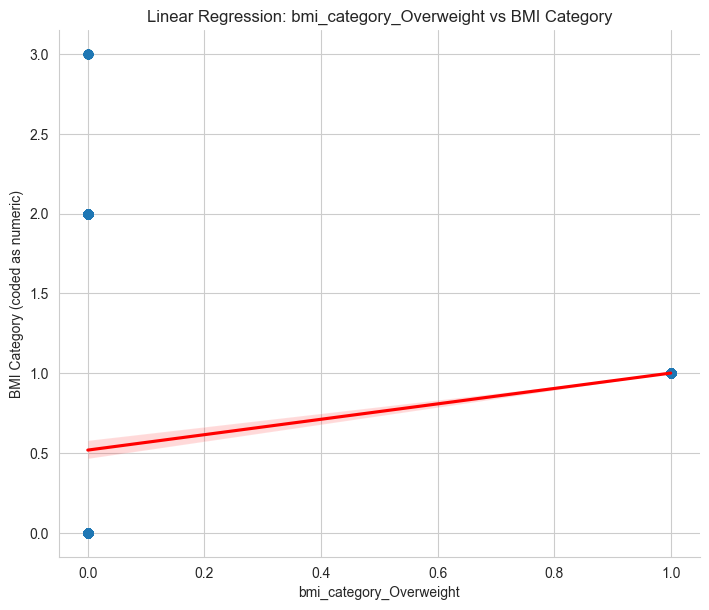

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample for performance
sample_df = df.sample(2000, random_state=42).copy()

# Convert BMI category to numeric code for regression plotting
sample_df['bmi_category_code'] = pd.factorize(sample_df['bmi_category'])[0]

# Linear regression plot
sns.lmplot(
    x=main_features[0],
    y='bmi_category_code',
    data=sample_df,
    line_kws={'color': 'red'},
    height=6,
    aspect=1.2
)

plt.title(f"Linear Regression: {main_features[0]} vs BMI Category")
plt.ylabel("BMI Category (coded as numeric)")
plt.xlabel(main_features[0])
plt.show()


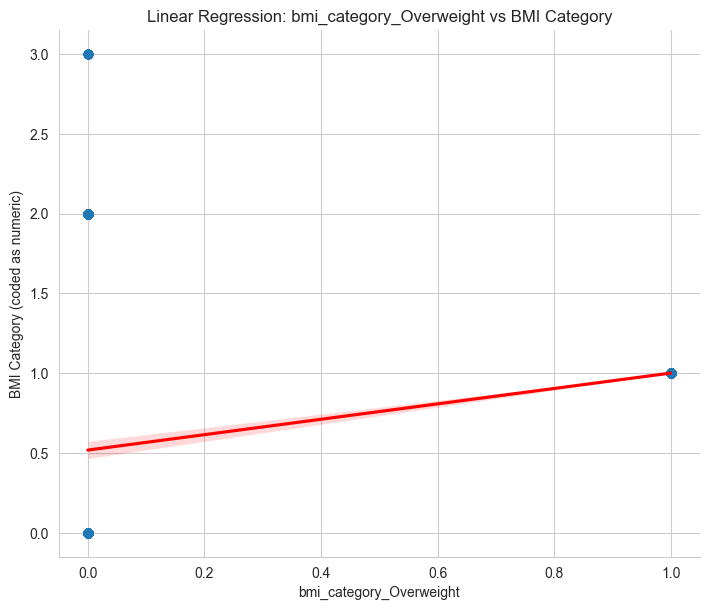

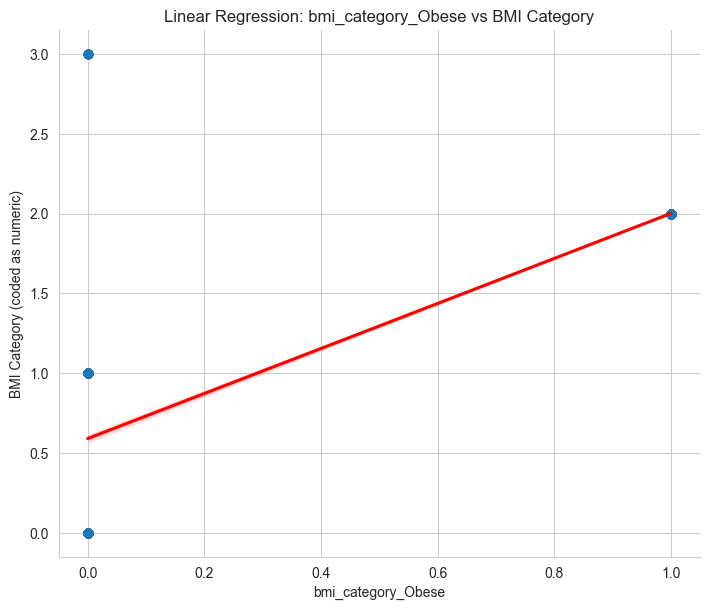

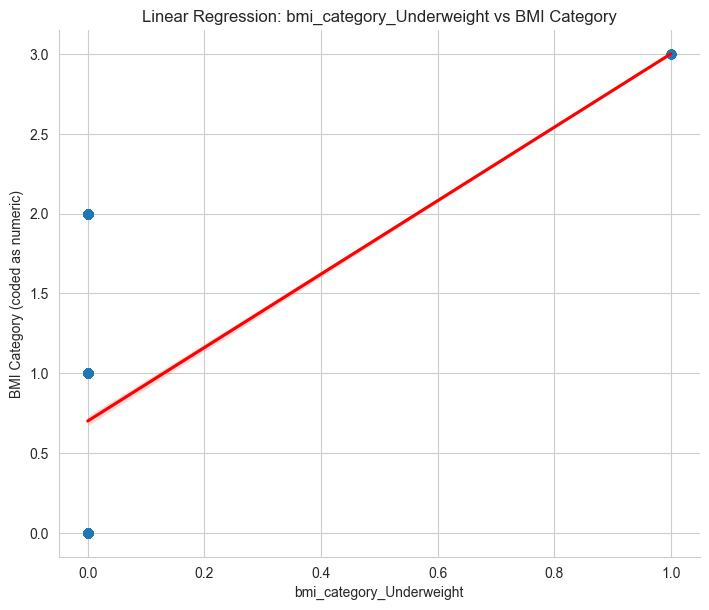

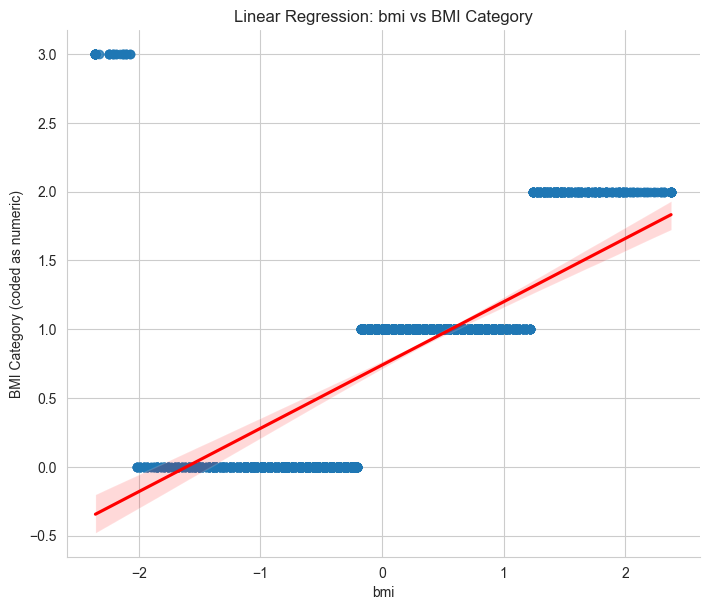

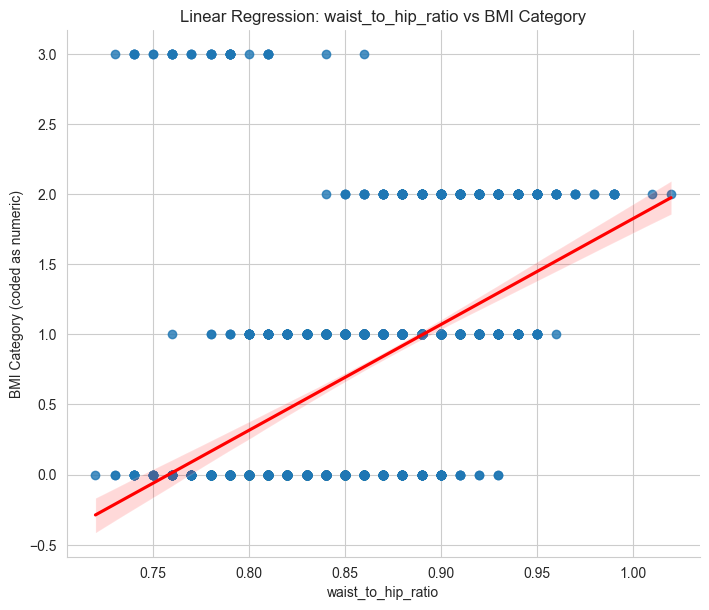

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample for performance
sample_df = df.sample(2000, random_state=42).copy()

# Convert BMI category to numeric code
sample_df['bmi_category_code'] = pd.factorize(sample_df['bmi_category'])[0]

# Plot linear regression for each main feature vs BMI category
for feature in main_features:
    sns.lmplot(
        x=feature,
        y='bmi_category_code',
        data=sample_df,
        line_kws={'color':'red'},
        height=6,
        aspect=1.2
    )
    plt.title(f"Linear Regression: {feature} vs BMI Category")
    plt.ylabel("BMI Category (coded as numeric)")
    plt.xlabel(feature)
    plt.show()


Interpretation of Outcomes

MSE (Mean Squared Error)
Measures the average squared difference between predictions and true values.

Smaller MSE → model predictions are closer to true values.

Since errors are squared, large mistakes are penalized heavily.

R² (Coefficient of Determination)
Indicates how well the model explains the variability of the target.

𝑅
2
=
1
R
2
=1: perfect prediction.

𝑅
2
=
0
R
2
=0: model predicts no better than the average.

𝑅
2
<
0
R
2
<0: model performs worse than a constant prediction.

In [43]:
# --- Step 1: Import Libraries ---
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# --- Step 2: Load Dataset ---
df = pd.read_csv(r'Process_data/diabetes_final_standardized.csv')  # use raw string for Windows paths

# --- Step 2.1: Remove rows with missing values ---
df = df.dropna()

# --- Step 3: Define Features and Target ---
# Predict 'diet_score' using numeric features only (float64 and int64)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Remove target from features
numeric_cols.remove('diet_score')
X = df[numeric_cols]
y = df['diet_score']

# --- Step 4: Split into Training and Testing ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 5: Train a Model (Linear Regression) ---
model = LinearRegression()
model.fit(X_train, y_train)

# --- Step 6: Make Predictions ---
y_pred = model.predict(X_test)

# --- Step 7: Compute Evaluation Metrics ---
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error (MSE): 0.0000
R² Score: 1.0000


Summary (Mathematical Insights)
Metric	Formula	Goal	Interpretation
MSE	
1
𝑛
∑
(
𝑦
𝑖
−
𝑦
^
𝑖
)
2
n
1
	​

∑(y
i
	​

−
y
^
	​

i
	​

)
2
	Minimize	Measures error magnitude
R²	
1
−
𝑆
𝑆
𝑟
𝑒
𝑠
𝑆
𝑆
𝑡
𝑜
𝑡
1−
SS
tot
	​

SS
res
	​

	​

	Maximize (≤1)	Measures proportion of variance explained

Together, MSE and R² provide a balanced view:

MSE → measures accuracy of predictions

R² → measures goodness of fit